In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### text preprocessing

## convert uppercase to lowercase

In [7]:
import re
import string

In [8]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [9]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

### remove links 

In [10]:

data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r"https?:\/\/.*[\r\n]*", "", x, flags=re.MULTILINE).split()))


In [11]:
data["tweet"].head(5)

0                         #fingerprint #pregnancy test
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

### Remove punctuations

In [12]:
import string

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [15]:
data["tweet"].head(5)

0                           fingerprint pregnancy test
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

### remove numbers

In [16]:
data["tweet"] = data["tweet"].str.replace('\d+','',regex = True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Dell User\AppData\Local\Temp\ipykernel_8388\3550061064.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["tweet"] = data["tweet"].str.replace('\d+','',regex = True)


In [17]:
data["tweet"].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

## REmove stropwords

In [18]:
!pip install nltk


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import nltk

In [20]:
# nltk.download('stopwords', download_dir='../static/model')

In [21]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [22]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [23]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split()if x not in sw))

In [24]:
data["tweet"].head()

0                           fingerprint pregnancy test
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

## stemming


In [25]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [26]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [27]:
data["tweet"].head()

0                            fingerprint pregnanc test
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [28]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vocabulary

In [29]:
from collections import Counter
vocab = Counter()

In [30]:
for sentence in data['tweet']:
    vocab.update(sentence.split())


In [31]:
len(vocab)

14923

In [32]:
tokens = [key for key in vocab if vocab[key] > 10]

In [33]:
len(tokens)

1076

In [34]:
#tokens

In [35]:
# def save_vocabulary(lines, filename):
#     data = '\n'.join(lines)
#     file = open(filename, 'w' ,encoding="utf-8")
#     file.write(data)
#     file.close()

# save_vocabulary(tokens, '../static/model/vocabulary.txt')

### devide Dataset

In [36]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [37]:
x = data['tweet']
y = data['label']

In [38]:
x

0                               fingerprint pregnanc test
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [39]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [40]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2)

In [42]:
x_train.shape

(6336,)

In [43]:
x_test.shape

(1584,)

In [44]:
print("X_train shape before vectorization:", x_train.shape)


X_train shape before vectorization: (6336,)


### Vectorization - coverting text values to numeric values

In [45]:
# def vectorizer(ds, vocabulary):
#     vectorized_lst = []
#     for sentence in ds:
#         sentence_lst = np.zeros(len(vocabulary))

#         for i in range(len(vocabulary)):
#             if vocabulary[i] in sentence.split():
#                 sentence_lst[i] = 1

#         vectorized_lst.append(sentence_lst)
#         vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

#         return vectorized_lst_new

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorized_x_train = vectorizer.fit_transform(x_train)  
print("Vectorized X_train shape:", vectorized_x_train.shape)  # Should be (6336, n_features)


Vectorized X_train shape: (6336, 12474)


In [47]:
vectorized_x_test = vectorizer.transform(x_test)
print("Vectorized X_test shape:", vectorized_x_test.shape)  # Should be (len(x_test), n_features)

Vectorized X_test shape: (1584, 12474)


In [48]:
import pickle

In [75]:
with open('../static/model/vectorizer.pickle', "wb") as f:
    pickle.dump(vectorizer, f)

In [76]:
x_test.shape

(1584,)

In [77]:
y_train

967     1
418     0
4841    0
586     0
6816    0
       ..
3861    0
3740    1
5219    1
5313    0
3991    0
Name: label, Length: 6336, dtype: int64

In [78]:
y_test

4780    1
6101    1
1840    1
6258    1
196     0
       ..
4636    0
140     0
4962    1
5341    0
2648    0
Name: label, Length: 1584, dtype: int64

In [79]:
y_train.value_counts()

label
0    4697
1    1639
Name: count, dtype: int64

In [80]:
# vectorized_x_test = vectorizer.transform(x_test)
# print("Vectorized X_test shape:", vectorized_x_test.shape)  # Should be (len(x_test), n_features)

In [81]:
# print("Before SMOTE - vectorized_x_train shape:", vectorized_x_train.shape)
# print("Before SMOTE - y_train shape:", y_train.shape)


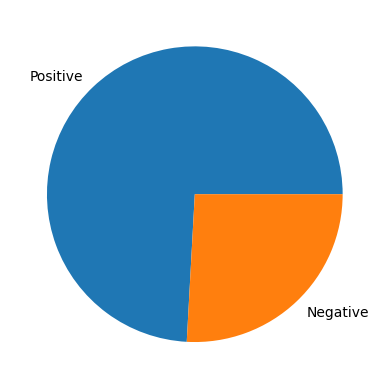

In [82]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]), labels=['Positive','Negative'])
plt.show()

##### This is a imbalanced dataset. Therefore we use "SMOT" Technique to balance dataset.

### Handle imbalanced dataset

In [53]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train,  y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9394, 12474) (9394,)


In [55]:
y_train_smote.value_counts()

label
1    4697
0    4697
Name: count, dtype: int64

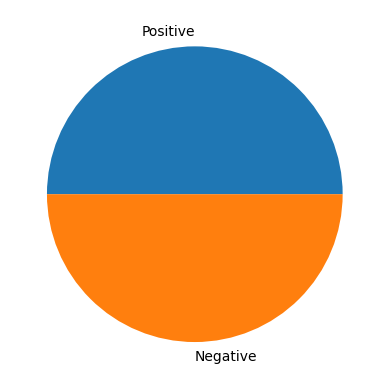

In [56]:
plt.pie(np.array([y_train.value_counts()[0],y_train_smote.value_counts()[1]]), labels=['Positive','Negative'])
plt.show()

### Model Training and Evaluation

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [58]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'training scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'testing scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')


    

    

### Logistic Regression

In [59]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_train_pred #predicted values

array([1, 0, 0, ..., 1, 1, 1], shape=(9394,))

In [60]:
y_train_smote 
#Actual values

0       1
1       0
2       0
3       0
4       0
       ..
9389    1
9390    1
9391    1
9392    1
9393    1
Name: label, Length: 9394, dtype: int64

In [61]:
training_scores(y_train_smote ,y_train_pred)

training scores:
	Accuracy = 0.94
	Precision = 0.91
	Recall = 0.976
	F1-Score = 0.942


In [62]:
y_test_pred = lr.predict(vectorized_x_test)
y_test_pred 

array([1, 1, 1, ..., 1, 1, 0], shape=(1584,))

In [63]:
y_test

4780    1
6101    1
1840    1
6258    1
196     0
       ..
4636    0
140     0
4962    1
5341    0
2648    0
Name: label, Length: 1584, dtype: int64

In [64]:
validation_scores(y_test, y_test_pred)

testing scores:
	Accuracy = 0.864
	Precision = 0.676
	Recall = 0.855
	F1-Score = 0.755


## Naive Bayes

In [65]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)
training_scores(y_train_smote ,y_train_pred)


y_test_pred = mnb.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

training scores:
	Accuracy = 0.932
	Precision = 0.888
	Recall = 0.988
	F1-Score = 0.935
testing scores:
	Accuracy = 0.87
	Precision = 0.666
	Recall = 0.938
	F1-Score = 0.779


## Decision Tree

In [66]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)
training_scores(y_train_smote ,y_train_pred)


y_test_pred = mnb.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

training scores:
	Accuracy = 0.999
	Precision = 1.0
	Recall = 0.999
	F1-Score = 0.999
testing scores:
	Accuracy = 0.87
	Precision = 0.666
	Recall = 0.938
	F1-Score = 0.779


## Random Forest

In [67]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)
training_scores(y_train_smote ,y_train_pred)


y_test_pred = rf.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

training scores:
	Accuracy = 0.932
	Precision = 0.888
	Recall = 0.988
	F1-Score = 0.935
testing scores:
	Accuracy = 0.882
	Precision = 0.756
	Recall = 0.762
	F1-Score = 0.759


## Support Vector Classifier

In [68]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)
training_scores(y_train_smote ,y_train_pred)


y_test_pred = svm.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

training scores:
	Accuracy = 0.993
	Precision = 0.988
	Recall = 0.999
	F1-Score = 0.993
testing scores:
	Accuracy = 0.874
	Precision = 0.761
	Recall = 0.708
	F1-Score = 0.734


In [69]:
import pickle

with open ('../static/model/model.pickle', 'wb')as file:
    pickle.dump(lr,file)